The following code is from
[Link](https://github.com/justinbois/rdsolver/blob/master/notebooks/asdm_example.ipynb)

In [2]:
import numpy as np
import numba
import scipy.integrate
from matplotlib import pyplot as plt

import rdsolver

In [3]:
D, beta, gamma, f, f_args, homo_ss = rdsolver.models.asdm()

In [4]:
D

array([0.005, 0.2  ])

In [5]:
beta

array([0.  , 0.02])

In [6]:
gamma

array([[-0.01,  0.  ],
       [ 0.  ,  0.  ]])

In [7]:
#f()
# rho_a, rho_s, kappa_a
f_args

(0.01, 0.02, 0.25)

In [8]:
homo_ss

array([1.  , 1.25])

In [9]:
# Load a standard ASDM model
D, beta, gamma, f, f_args, homo_ss = rdsolver.models.asdm()

# Set up the space and time grid
n = (32, 32)
L = (50, 50)
t = np.linspace(0, 50000, 512)

beta = np.array([0.00, 0.02])
f_args = (f_args[0], f_args[1], 1.0)

# Initial condition and solve
c0 = rdsolver.initial_condition(uniform_conc=homo_ss, n=n, L=L)
c = rdsolver.solve(c0, t, D=D, beta=beta, gamma=gamma, f=f, f_args=f_args, L=L)

# Interpolate the solution
c_interp = rdsolver.viz.interpolate_concs(c)

100%|██████████| 512/512 [00:15<00:00, 34.04it/s] 


In [7]:
t[-2:]

array([49902.15264188, 50000.        ])

In [34]:
with open('../turing_sigma_s_0_02_kappa_0.npy', 'wb') as f:
    np.save(f, c)
    
with open('../turing_t_sigma_s_0_02_kappa_0.npy', 'wb') as f:
    np.save(f, t)
   

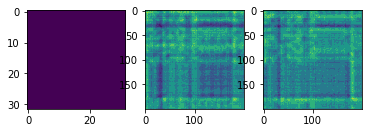

In [13]:
# Direct solution
plt.subplot(131)
plt.imshow(c[0, :,:,-1])
# Interpolated solutions
plt.subplot(132)
plt.imshow(c_interp[0, :,:,-1])
plt.subplot(133)
plt.imshow(c_interp[1, :,:,-1])
plt.show()

### Making an animation

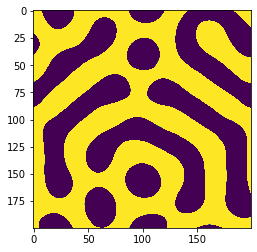

In [10]:
from matplotlib.animation import FuncAnimation

fig = plt.figure()

im = im=plt.imshow(c_interp[0, :,:,0])#  ,interpolation='none')
def init():
    im.set_data(c_interp[0, :,:,0])
    return [im]
    
def animate(i):    
    a=im.get_array()
    a=c_interp[0, :,:,i] 
    im.set_array(c_interp[0, :,:,i] )
    return [im]

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=len(t), interval=50, blit=True)


anim.save('turring.gif', writer='imagemagick')

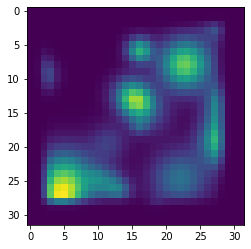

In [28]:
plt.imshow(c[0, :,:,0])
plt.show()